In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
db = pd.read_csv("/content/diabetes.csv")

# STEP 1 : UNDERSTAND DATA

In [ ]:
db.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
db.shape

(768, 9)

Pregnancies	 - Number of time Pregnant

Glucose- Plasma Glucose concentration over 2 hours in an oral glucose tolerance test

BloodPressure - Diastolic BloodPressure

SkinThickness - Triceps Skin Fold Thickness

Insulin - 2 - Hour Serum Insulin

BMI - Body Mass Index ( weight in kg / (height in m)2)

DiabetesPedigreeFunction - a function which scores likelihood of diabetes based on Family History




In [ ]:
db.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
db.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
db.value_counts()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  Age  Outcome
0            57       60             0              0        21.7  0.735                     67   0          1
             67       76             0              0        45.3  0.194                     46   0          1
5            103      108            37             0        39.2  0.305                     65   0          1
             104      74             0              0        28.8  0.153                     48   0          1
             105      72             29             325      36.9  0.159                     28   0          1
                                                                                                            ..
2            84       50             23             76       30.4  0.968                     21   0          1
             85       65             0              0        39.6  0.930                     27   0          1
      

In [ ]:
db.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# STEP 2 : BUILDING LOGISTIC REGRESSION MODEL

In [ ]:
db.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
features = db.drop("Outcome",axis = 1)
features

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [ ]:
label = db[['Outcome']]
label

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score

In [ ]:
sss= StratifiedShuffleSplit(n_splits=4,test_size = 0.25,random_state = 42)

In [ ]:
sss.get_n_splits(features,label)

4

In [ ]:
scores = []
for train_index,test_index in sss.split(features,label):
  x_train,x_test = features.iloc[train_index],features.iloc[test_index]
  y_train,y_test = label.iloc[train_index],label.iloc[test_index]
  

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_reg = LogisticRegression()

In [ ]:
log_reg.fit(x_train,y_train)

LogisticRegression()

In [ ]:
log_reg.fit(x_train, y_train)
y_pred = log_reg.predict(x_test)


In [ ]:
y_pred = log_reg.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score

In [ ]:
mean_squared_error(y_pred,y_test)

0.234375

# STEP 3 - PREDICT ON NEW SAMLPE

In [ ]:
new_person = [[6,200,90,10,25,23.3,0.672,42]]

log_reg.predict(new_person)

array([1])

# COMPUTE CLASIFICATION METRICS

In [ ]:
def calculate_score(test,pred):
  accuracy = accuracy_score(test, pred)
  precision =precision_score(test,pred)
  recall  = recall_score(test, pred)
  roc_auc = roc_auc_score(test, pred)

  return accuracy,precision,recall,roc_auc


In [ ]:
calculate_score(y_test, y_pred)

(0.765625, 0.6896551724137931, 0.5970149253731343, 0.7265074626865671)

In [ ]:
print('accuracy_score : ',accuracy_score(y_test, y_pred))
print('precision_score : ',precision_score(y_test,y_pred))
print('recall_score : ',recall_score(y_test, y_pred))
print('roc_auc_score : ',roc_auc_score(y_test, y_pred))


accuracy_score :  0.765625
precision_score :  0.6896551724137931
recall_score :  0.5970149253731343
roc_auc_score :  0.7265074626865671


# STEP 4 - CORRELATION

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import  ConfusionMatrixDisplay

In [ ]:
db.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [ ]:
cm = confusion_matrix(y_test,y_pred)

In [ ]:
cm

array([[107,  18],
       [ 27,  40]])

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


Text(33.0, 0.5, 'ypred')

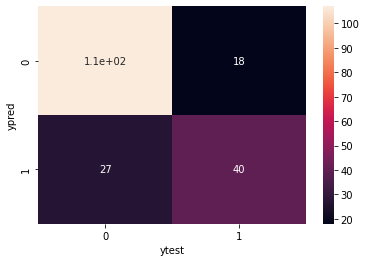

In [ ]:
sns.heatmap(cm,annot=True)
plt.xlabel("ytest")
plt.ylabel("ypred")

# INTERPRETATION -
##### True negative : 40 Samples are correctly identified as 1(having diabetes)
##### True positive : 107 Samples are correctly identified as 0 (not having diabetes)

##### False negative :27 samples are misclassified as 1(having diabetes) despite being 0(not having diabetes)

##### False positive : 18 samples are misclassified as 0 (not having diabetes)despite being 1(having diabetes)



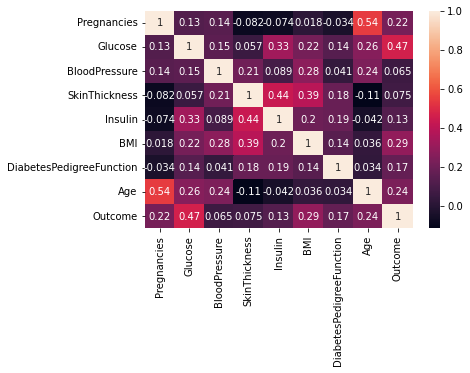

In [ ]:
sns.heatmap(db.corr(),annot=True)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       125
           1       0.69      0.60      0.64        67

    accuracy                           0.77       192
   macro avg       0.74      0.73      0.73       192
weighted avg       0.76      0.77      0.76       192



In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# STEP 5 - MINMAX SCALER

In [ ]:
minmax = MinMaxScaler()

In [ ]:
#xtrain
scaled_x_train_minmax = minmax.fit_transform(x_train)

In [ ]:
# xtest
scaled_x_test_minmax = minmax.transform(x_test)

In [ ]:
log_reg_minmax = LogisticRegression()

In [ ]:
log_reg_minmax.fit(scaled_x_train_minmax,y_train)

LogisticRegression()

In [ ]:
y_pred_minmax = log_reg_minmax.predict(scaled_x_test_minmax)

In [ ]:
calculate_score(y_test,y_pred_minmax)

(0.765625, 0.7115384615384616, 0.5522388059701493, 0.7161194029850746)

# STEP 6 - STANDARD SCALER

In [ ]:
scale = StandardScaler()

In [ ]:
#xtrain
scaled_x_train_norm = scale.fit_transform(x_train)

In [ ]:
# xtest
scaled_x_test_norm = scale.transform(x_test)

In [ ]:
log_reg_norm = LogisticRegression()

In [ ]:
log_reg_norm.fit(scaled_x_train_norm,y_train)

LogisticRegression()

In [ ]:
y_pred_norm = log_reg_norm.predict(scaled_x_test_norm)

In [ ]:
calculate_score(y_test,y_pred_norm)

(0.765625, 0.6964285714285714, 0.582089552238806, 0.7230447761194031)

In [ ]:
calculate_score(y_test,y_pred)

(0.765625, 0.6896551724137931, 0.5970149253731343, 0.7265074626865671)

In [ ]:
calculate_score(y_test,y_pred_minmax)

(0.765625, 0.7115384615384616, 0.5522388059701493, 0.7161194029850746)

STEP 7 - PLOT ROC CURVE

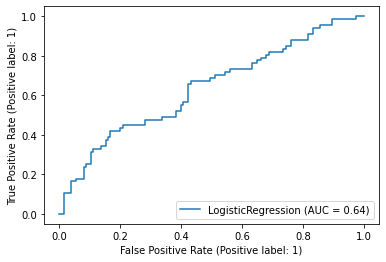

In [ ]:
from sklearn.metrics import plot_roc_curve, auc 
plot_roc_curve(log_reg,scaled_x_test_norm,y_test)

predict() is used to predict the actual class (in your case one of 0, 1, or 2).


predict_proba() is used to predict the class probabilities
From the example output that you shared,

predict() would output class 0 since the class probability for 0 is 0.6.
[0.6, 0.2, 0.2] is the output of predict_proba that simply denotes that the class probability for classes 0, 1, and 2 are 0.6, 0.2, and 0.2 respectively

In [ ]:
# scaled_x_test_norm # co eff
# y_test
# pred_prob1 # calculating class - probability for each sample

Returns:
--fpr  ndarray of shape (>2,)

Increasing false positive rates such that element i is the false positive rate of predictions with score >= thresholds[i].

--tpr  ndarray of shape (>2,)

Increasing true positive rates such that element i is the true positive rate of predictions with score >= thresholds[i].

--thresholds   ndarray of shape = (n_thresholds,)


Decreasing thresholds on the decision function used to compute fpr and tpr. thresholds[0] represents no instances being predicted and is arbitrarily set to max(y_score) + 1.

In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
pred_prob_minmax = log_reg_minmax.predict_proba(scaled_x_test_minmax)
pred_prob_norm = log_reg_norm.predict_proba(scaled_x_test_norm)
pred_prob_llog = log_reg.predict_proba(x_test)


# model.predict_proba(x_test)

In [ ]:
# roc 
# plot ytest and predict_proba(x_test)

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, pred_prob_minmax[:,1], pos_label=1)
fpr1, tpr1, thresholds1 = roc_curve(y_test,pred_prob_norm[:,1], pos_label=1)
fpr2, tpr2, thresholds2 = roc_curve(y_test,pred_prob_llog[:,1], pos_label=1)



auc0 = auc(fpr,tpr)
auc1 = auc(fpr1,tpr1)
auc2 = auc(fpr2,tpr2)

# pred_prob_log = log_reg_minmax.predict_proba(scaled_x_test_norm)


# pred_prob = log_reg_minmax.predict_proba(scaled_x_test_norm)

# log_reg_norm

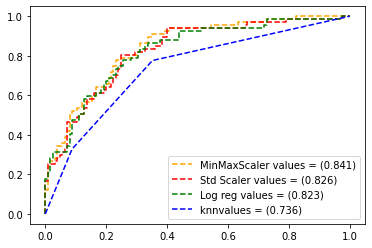

In [ ]:
plt.plot(fpr,tpr,linestyle='--',color='orange',label='MinMaxScaler values = (%.3f)'%auc0)
plt.plot(fpr1,tpr1,linestyle='--',color='red',label='Std Scaler values = (%.3f)'%auc1)
plt.plot(fpr2,tpr2,linestyle='--',color='green',label='Log reg values = (%.3f)'%auc2)
plt.plot(fpr4, tpr4,linestyle='--',color='blue',label='knnvalues = (%.3f)'%auc4)
plt.legend()

In [ ]:
 roc_auc = auc(fpr, tpr)

## knn


In [ ]:
len(scaled_x_train_minmax)

576

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 

In [ ]:
model3 = KNeighborsClassifier(n_neighbors=2)


In [ ]:
model3.fit(scaled_x_train_minmax,y_train)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
knn_y_pred = model3.predict(scaled_x_test_minmax)
knn_y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0])

In [ ]:
accuracy_score(y_test,knn_y_pred)

0.7083333333333334

In [ ]:
precision_score(y_test,knn_y_pred)

0.6666666666666666

In [ ]:
recall_score(y_test,knn_y_pred)

0.3283582089552239

In [ ]:
knn_auc = roc_auc_score(y_test,knn_y_pred)
knn_auc

0.6201791044776119

## Step9 [Update ROC curve]

In [ ]:
knn_pred_prob = model3.predict_proba(scaled_x_test_minmax)
knn_pred_prob

In [ ]:
knn_roc = model3.predict_proba(scaled_x_test_minmax)

In [ ]:
fpr4, tpr4, thresholds4 = roc_curve(y_test,knn_roc[:,1], pos_label=1)

In [ ]:
auc4 = auc(fpr4,tpr4)

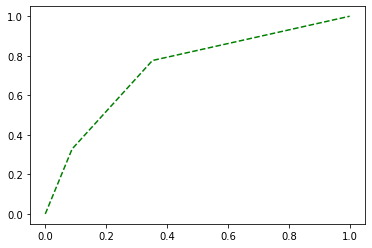

In [ ]:
plt.plot(fpr4, tpr4,linestyle='--',color='green',label='knnvalues = (%.3f)'%auc4)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       125
           1       0.69      0.60      0.64        67

    accuracy                           0.77       192
   macro avg       0.74      0.73      0.73       192
weighted avg       0.76      0.77      0.76       192



In [ ]:
accuracy_score(y_test,y_pred)

0.765625

In [ ]:
cm = confusion_matrix(y_test,y_pred)


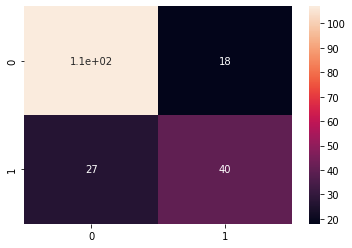

In [ ]:
sns.heatmap(cm,annot=True)



